In [48]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt


In [49]:
def load_json(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

def normalization(keypoints):
    # 만약 2차원이면 3차원으로 만들어서 처리한후, 다시 2차원으로 만들어준다.
    input_shape = keypoints.shape
    if len(input_shape) == 2:
        keypoints = keypoints.reshape(-1,17,2)
    center_head_y = keypoints[:,0,1]
    center_foot_y = (keypoints[:,15,1] + keypoints[:,16,1])/2
    center_foot_00 = (keypoints[:,15,:] + keypoints[:,16,:])/2



    # 1. 15,16번점의 중점을 (0,0)으로 만들어준다.
    keypoints = keypoints - center_foot_00.reshape(-1,1,2)

    # 2. 0번점의 Y축 값과 15,16의 Y축값의 길이를 0과 1로 만들어준다.
    heidht = center_head_y - center_foot_y
    keypoints= keypoints/ heidht.reshape(-1,1,1)

    if len(input_shape) == 2:
        keypoints = keypoints.reshape(17,2)
    return keypoints


def body_drawing(ax, normalized_keypoints):
    # Head 0 ~ 4
    ax.scatter(normalized_keypoints[0, 0], normalized_keypoints[0, 1], s=10, color='red')
    ax.scatter(normalized_keypoints[1, 0], normalized_keypoints[1, 1], s=10, color='red')
    ax.scatter(normalized_keypoints[2, 0], normalized_keypoints[2, 1], s=10, color='red')
    ax.scatter(normalized_keypoints[3, 0], normalized_keypoints[3, 1], s=10, color='red')
    ax.scatter(normalized_keypoints[4, 0], normalized_keypoints[4, 1], s=10, color='red')

    # Body
    ax.plot(normalized_keypoints[5, 0], normalized_keypoints[5, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[6, 0], normalized_keypoints[6, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[12, 0], normalized_keypoints[12, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[11, 0], normalized_keypoints[11, 1], 'o', markersize=3, color='red')

    # Left Arm
    ax.plot(normalized_keypoints[5, 0], normalized_keypoints[5, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[9, 0], normalized_keypoints[9, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[7, 0], normalized_keypoints[7, 1], 'o', markersize=3, color='red')

    # Right Arm
    ax.plot(normalized_keypoints[6, 0], normalized_keypoints[6, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[10, 0], normalized_keypoints[10, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[8, 0], normalized_keypoints[8, 1], 'o', markersize=3, color='red')

    # Left Leg
    ax.plot(normalized_keypoints[11, 0], normalized_keypoints[11, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[13, 0], normalized_keypoints[13, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[15, 0], normalized_keypoints[15, 1], 'o', markersize=3, color='red')

    # Right Leg
    ax.plot(normalized_keypoints[12, 0], normalized_keypoints[12, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[14, 0], normalized_keypoints[14, 1], 'o', markersize=3, color='red')
    ax.plot(normalized_keypoints[16, 0], normalized_keypoints[16, 1], 'o', markersize=3, color='red')

In [50]:
adress = load_json('./dataset/not_address.json')
adress

[{'index': 0,
  'label': 0,
  'keypoints': [[351.24407958984375, 128.666748046875],
   [373.31292724609375, 101.22535705566406],
   [323.1353759765625, 101.34907531738281],
   [399.4210205078125, 110.18563842773438],
   [277.93255615234375, 113.03024291992188],
   [448.6666564941406, 268.93450927734375],
   [232.39208984375, 236.94345092773438],
   [455.84661865234375, 458.5581970214844],
   [153.25686645507812, 360.5213623046875],
   [0.0, 0.0],
   [86.49356079101562, 430.812255859375],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0]]},
 {'index': 1,
  'label': 0,
  'keypoints': [[344.06890869140625, 136.17759704589844],
   [366.37933349609375, 105.81387329101562],
   [314.7633361816406, 107.81822204589844],
   [394.4091796875, 108.90248107910156],
   [270.8786926269531, 116.16706848144531],
   [443.75946044921875, 266.2463684082031],
   [235.61599731445312, 238.35733032226562],
   [455.47503662109375, 455.1380920410156],
   [161.54806518554688

In [51]:
label = []
keypoints = []
for i in range(len(adress)):
    label.append(adress[i]['label'])
    keypoints.append(adress[i]['keypoints'])

keypoints = np.array(keypoints)


In [52]:
print(len(label))
print(keypoints.shape)

7
(7, 17, 2)


In [53]:
normalized_keypoints = normalization(keypoints)
normalized_keypoints.shape

(7, 17, 2)

In [54]:
sample = normalized_keypoints[0]
sample.shape

(17, 2)

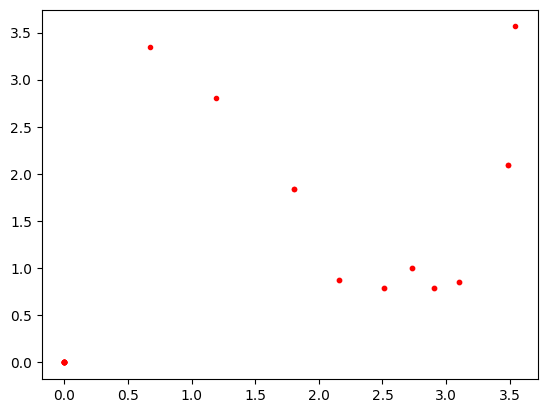

In [56]:

# 데이터 이상한건 그냥 앉은데이터 넣어서 그런듯 
ax = plt.subplot()
body_drawing(ax, sample)
